# Group 19 PS 6

In [7]:
# import libraries
import numpy as np
from numpy.polynomial import chebyshev
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

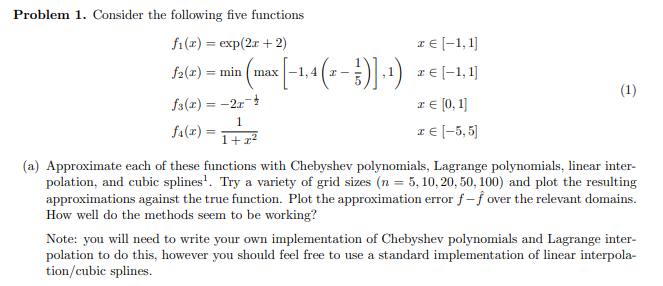

In [4]:
# functions to be approximated
def f1(x):
    return np.exp(2*x + 2)
def f2(x):
    return np.minimum(np.maximum(-1, 4*(x-1/5)), 1)
def f3(x):
    return -2 * np.sqrt(x)
def f4(x):
    return 1 / (1 + x**2)

# Chebyshev function approximation

The expression np.arange(n + 1, dtype=float) creates an array of n + 1 values, starting from 0 and ending at n. This array is then scaled by dividing it by n and multiplying it by π to give the angles in radians for each node. The expression np.cos(np.pi * np.arange(n + 1, dtype=float) / n)

The chebyshev.chebfit function fits a Chebyshev series of a given degree to the data points (nodes, fvals). The degree of the Chebyshev series is specified by the argument n, which should be the same as the number of nodes n. The function returns an array of coefficients, starting with the coefficient of the highest degree term and ending with the constant term.

The approximation error over the relevant domain is the difference between the true function and its approximation. In this case, it is defined as f - f_approx. This represents how close the approximation is to the true function over the relevant domain. A small approximation error means that the approximation is a good fit to the true function over the relevant domain.

Max error for n =  5 is 0.04655446143654629
Max error for n =  10 is 8.105089630561224e-07
Max error for n =  20 is 1.2789769243681803e-13
Max error for n =  50 is 3.7481129311345285e-13
Max error for n =  100 is 2.828848266744899e-13


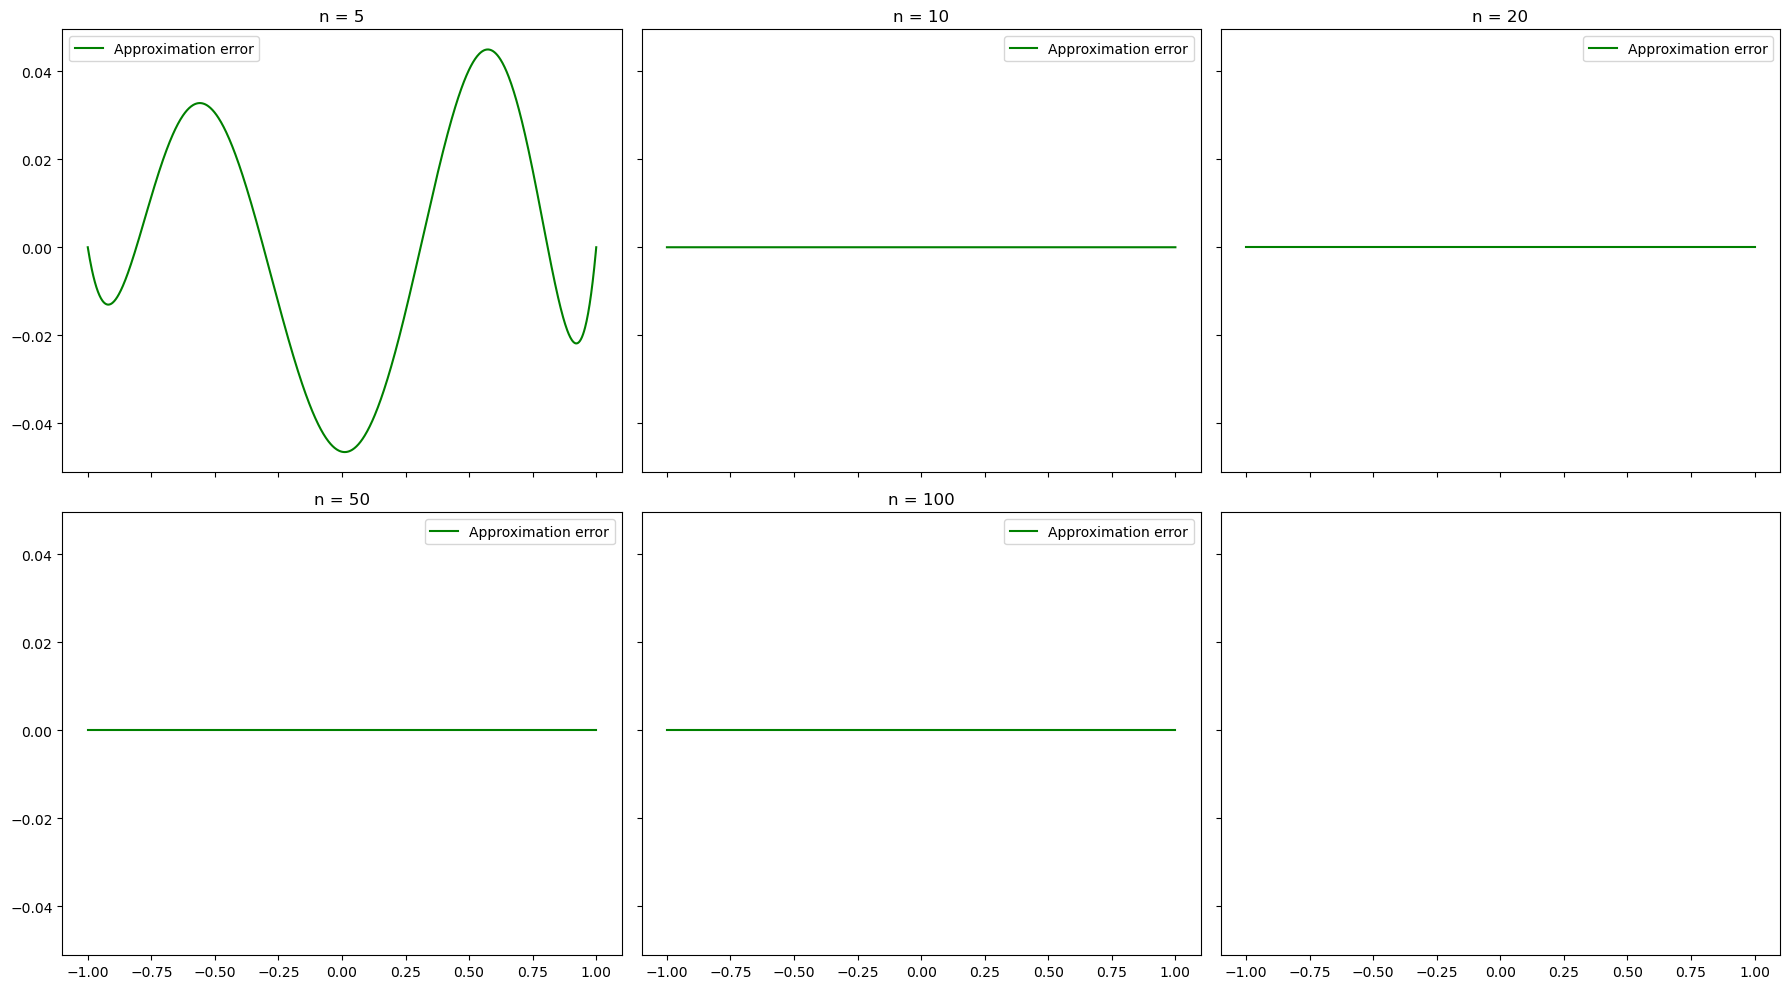

In [8]:
def chebyshev_nodes(n, a, b):
    '''The function returns an array of n + 1 nodes '''
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos(np.pi * np.arange(n + 1, dtype=float) / n)

n_values = [5, 10, 20, 50, 100]
a, b = -1, 1
x = np.linspace(a, b, 1000)
y = f1(x)

def chebyshev_error_grapher(function,a = -1, b=1 ):
    n_values = [5, 10, 20, 50, 100]
    x = np.linspace(a, b, 1000) #domain 
    y = function(x) #true function evaluated in our domain 

    fig, ax = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
    ax = ax.ravel()


    for i, n in enumerate(n_values):
        nodes = chebyshev_nodes(n, a, b)
        fvals = function(nodes)
        coefficients = chebyshev.chebfit(nodes, fvals, n)
        y_approx = chebyshev.chebval(x, coefficients)
        error = y - y_approx
        
        ax[i].plot(x, error, 'g', label='Approximation error')
        ax[i].legend()
        ax[i].set_title(f'n = {n}')
        #the errors are relatively small even if they do fluctuate.
        #  Thus maximum error might be a better to illustrate the error 
        max_error = np.abs(y - y_approx).max()
        print('Max error for n = ',n,'is', max_error)
        
        
    plt.tight_layout()
    plt.show()

chebyshev_error_grapher(f1)

Max error for n =  5 is 0.04655446143654629
Max error for n =  10 is 8.105089630561224e-07
Max error for n =  20 is 1.2789769243681803e-13
Max error for n =  50 is 3.7481129311345285e-13
Max error for n =  100 is 2.828848266744899e-13


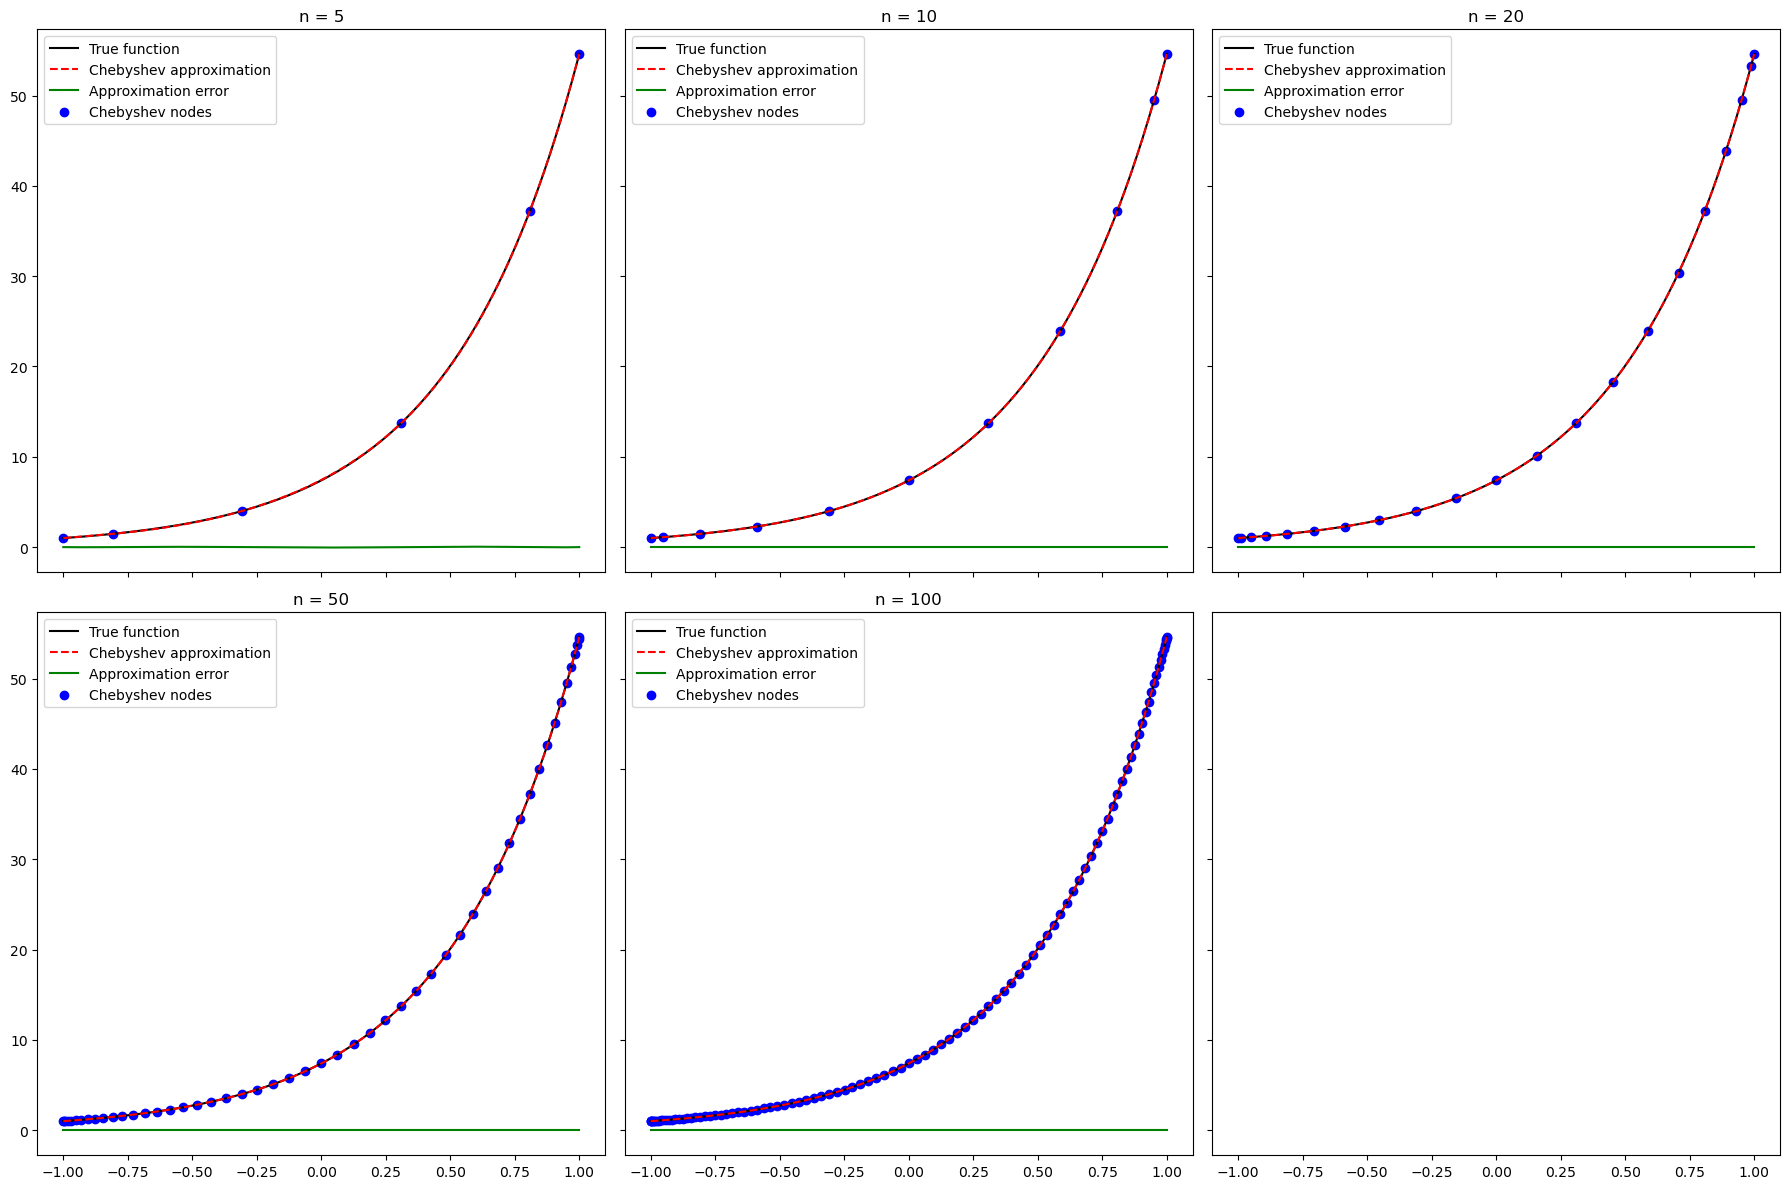

In [9]:
#combining the 2 


def chebyshev_grapher(function, a = -1, b = 1):
    #settings
    n_values = [5, 10, 20, 50, 100]
    x = np.linspace(a, b, 1000) # x domain 
    y = function(x) # true function evaluated 
    fig, ax = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
    ax = ax.ravel()

    for i, n in enumerate(n_values): #i takes on the values 0, 1, 2, 3, 4, and n takes on the values 5, 10, 20, 50, and 100
        nodes = chebyshev_nodes(n, a, b)
        fvals = function(nodes) #function evaluated at nodes 
        coefficients = chebyshev.chebfit(nodes, fvals, n) #chebyshev coefficients 
        y_approx = chebyshev.chebval(x, coefficients) #chebyshev approximation i.e subs our coefficients into eqns (7) in the slides
        error = y - y_approx

        max_error = np.abs(y - y_approx).max()
        print('Max error for n = ',n,'is', max_error)


        ax[i].plot(x, y, 'k', label='True function')
        ax[i].plot(x, y_approx, 'r--', label='Chebyshev approximation')
        ax[i].plot(x, error, 'g', label='Approximation error')
        ax[i].scatter(nodes, fvals, color='blue', label='Chebyshev nodes')
        ax[i].legend()
        ax[i].set_title(f'n = {n}')
    plt.tight_layout()
    plt.show()
    
chebyshev_grapher(f1)   
#the errors are relatively small even if they do fluctuate.
#  Thus maximum error might be a better to illustrate the error 

# Lagrange function approximation

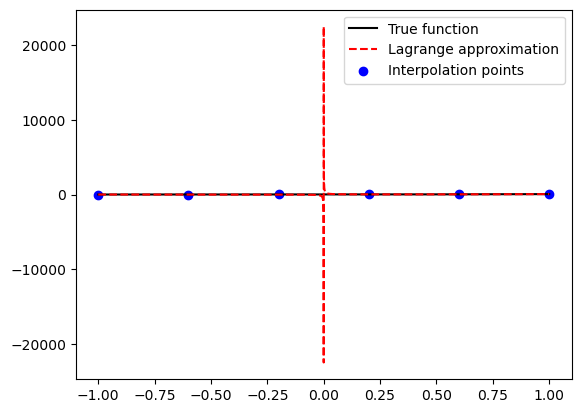

In [10]:
def f(x):
    """
    The function we want to approximate.
    """
    return np.exp(2 * x + 2)



# Define the set of n+1 points
a = -1 
b = 1
n = 5
x_values = np.linspace(a, b, n + 1) #interpolation points 
y_values = f(x_values) 

# Construct the Vandermonde matrix , input is the points we evaluate the lagrangian at 
V = np.vander(x_values, N=n + 1) 

# Solve for the Lagrange coefficients 
coefficients = np.linalg.solve(V, y_values)

def evaluate(a, x): # albert's code 
    return sum(a[s] * x**(s-1) for s in range(len(a)))

# Evaluate the Lagrange approximation on a dense grid
x = np.linspace(-1, 1, 10000)
y_approx = np.polyval(coefficients[::-1], x) #basically subs back 
#coeffcients array needs to be reversed,
#  as numpy.polyval expects the coefficients in increasing order of degree.
y_approx = evaluate(coefficients, x)

# Plot the true function and the approximation
plt.plot(x, f(x), 'k', label='True function')
plt.plot(x, y_approx, 'r--', label='Lagrange approximation')
plt.scatter(x_values, y_values, color='blue', label='Interpolation points')
plt.legend()
plt.show()

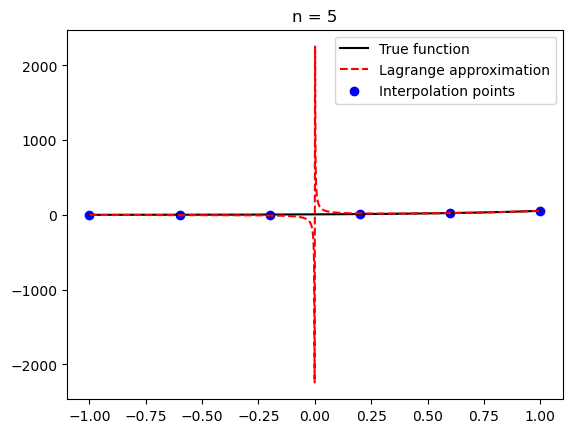

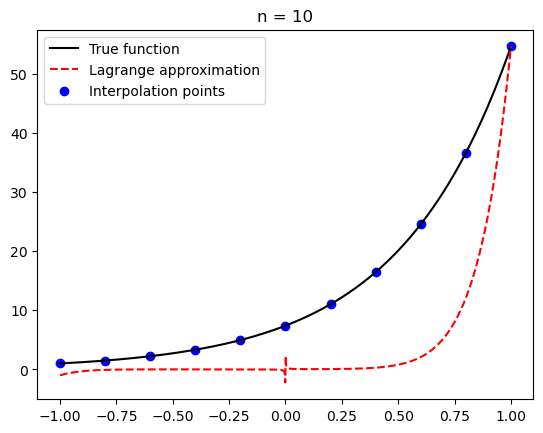

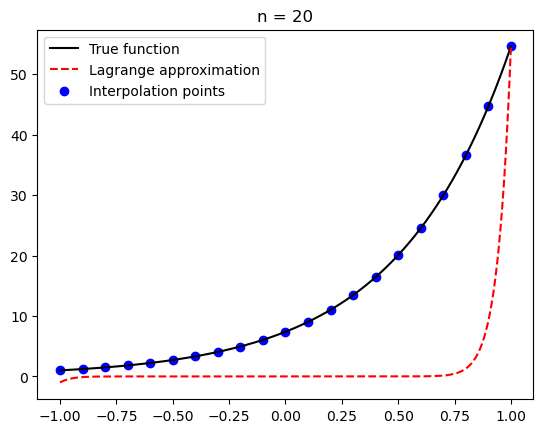

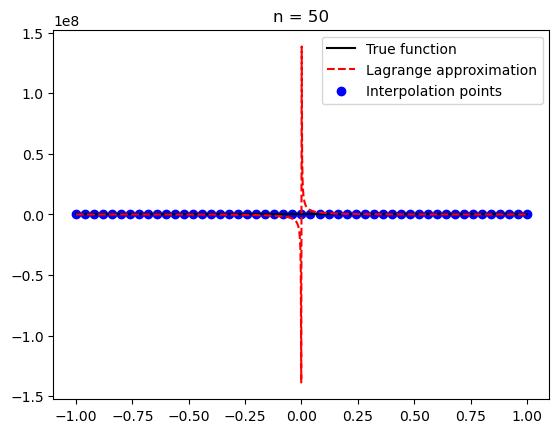

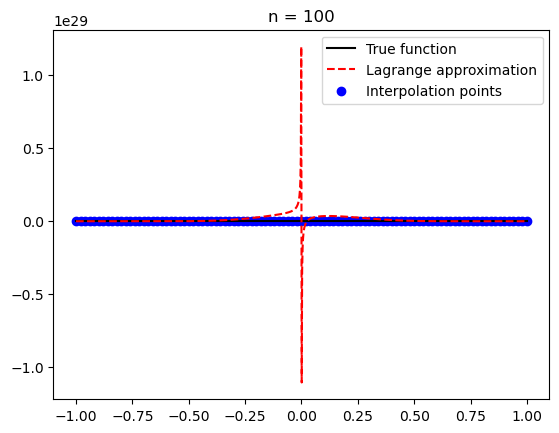

In [15]:
def f(x):
    """
    The function we want to approximate.
    """
    return np.exp(2 * x + 2)

def lagrange_interpolation(x_vals, y_vals, x):
    n = len(x_vals)
    result = 0
    for i in range(n):
        term = y_vals[i]
        for j in range(n):
            if j != i:
                term *= (x - x_vals[j])/(x_vals[i] - x_vals[j])
        result += term
    return result
    
# def f(x):
#     return 1/(1+x**2) 


a = -1
b = 1

n_values = [5, 10, 20, 50, 100]

for n in n_values:
    # Define the set of n+1 points
    x_values = np.linspace(a, b, n + 1) #interpolation points 
    y_values = f(x_values) 

    # Construct the Vandermonde matrix , input is the points we evaluate the lagrangian at 
    V = np.vander(x_values, N=n + 1) 

    # Solve for the Lagrange coefficients 
    coefficients = np.linalg.solve(V, y_values)

    # Evaluate the Lagrange approximation on a dense grid
    x = np.linspace(a, b, 1000)
    y_approx = np.polyval(coefficients[::-1], x) #basically subs back 
    #coeffcients array needs to be reversed,
    #  as numpy.polyval expects the coefficients in increasing order of degree.
    y_approx = evaluate(coefficients, x)

    # Plot the true function and the approximation
    plt.plot(x, f(x), 'k', label='True function')
    plt.plot(x, y_approx, 'r--', label='Lagrange approximation')
    plt.scatter(x_values, y_values, color='blue', label='Interpolation points')
    plt.legend()
    plt.title(f"n = {n}")
    plt.show()

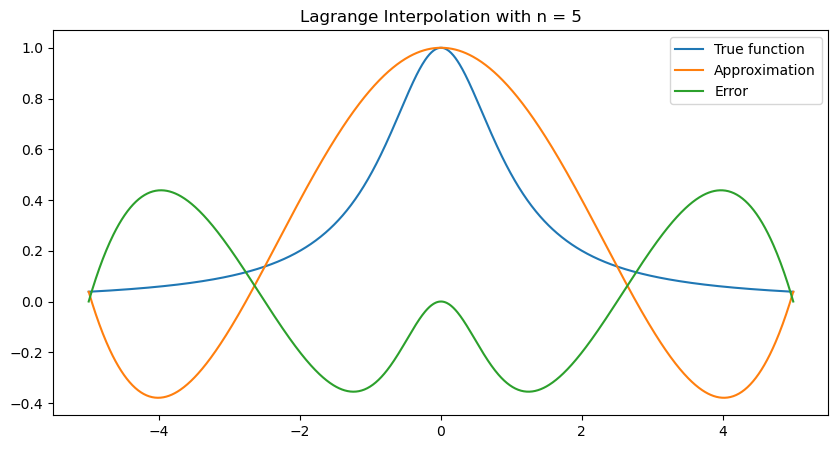

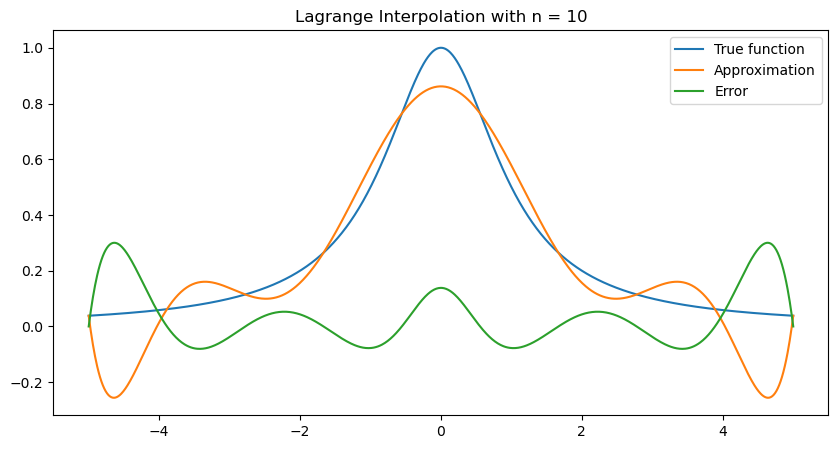

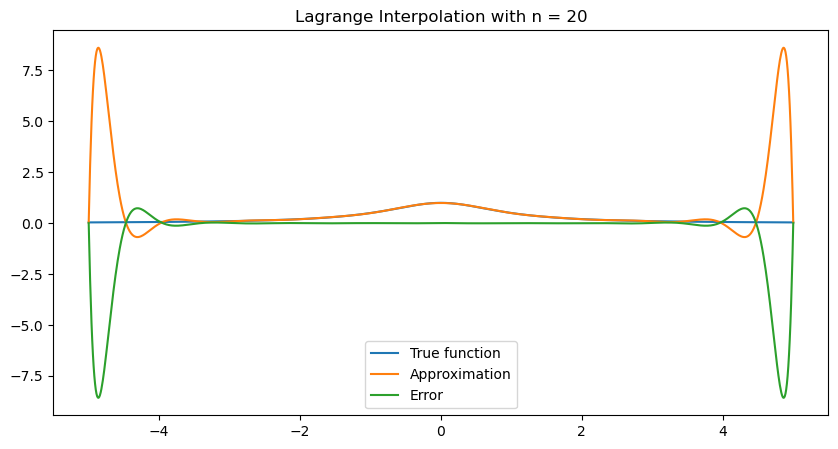

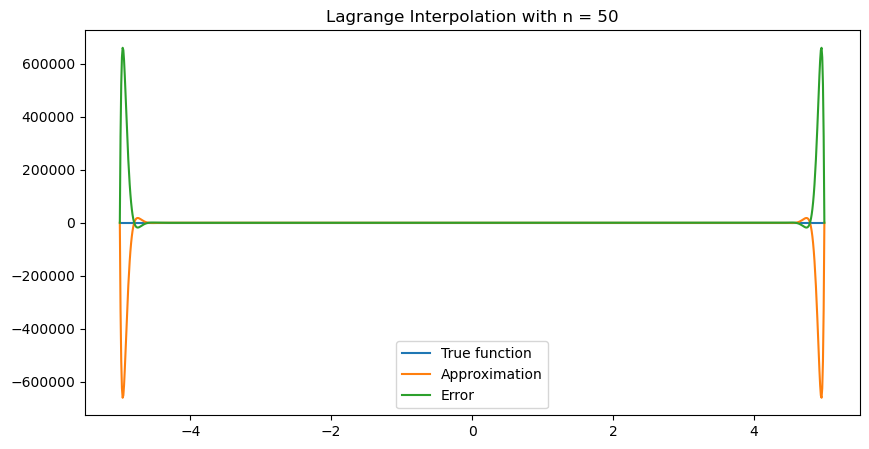

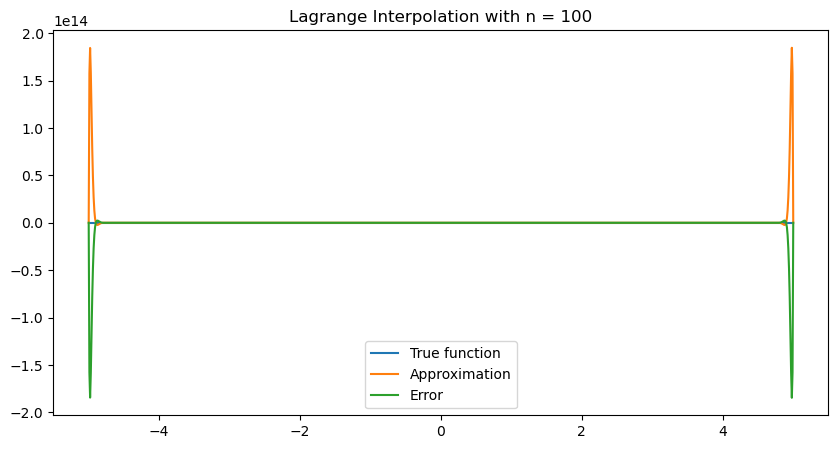

In [16]:
def f(x):
    return 1/(1 + x**2)

grid_sizes = [5, 10, 20, 50, 100]
x = np.linspace(-5, 5, 1000)
y = f(x)

for n in grid_sizes:
    x_vals = np.linspace(-5, 5, n)
    y_vals = f(x_vals)
    y_approx = [lagrange_interpolation(x_vals, y_vals, i) for i in x]
    error = y - y_approx
    
    plt.figure(figsize=(10,5))
    plt.title(f"Lagrange Interpolation with n = {n}")
    plt.plot(x, y, label="True function")
    plt.plot(x, y_approx, label="Approximation")
    plt.plot(x, error, label="Error")
    plt.legend()
    plt.show()

Max error for n =  5 is 0.4383497951290457
Max error for n =  10 is 0.30028454351755707
Max error for n =  20 is 8.57536082643985
Max error for n =  50 is 660564.9314023153
Max error for n =  100 is 184592774826518.06


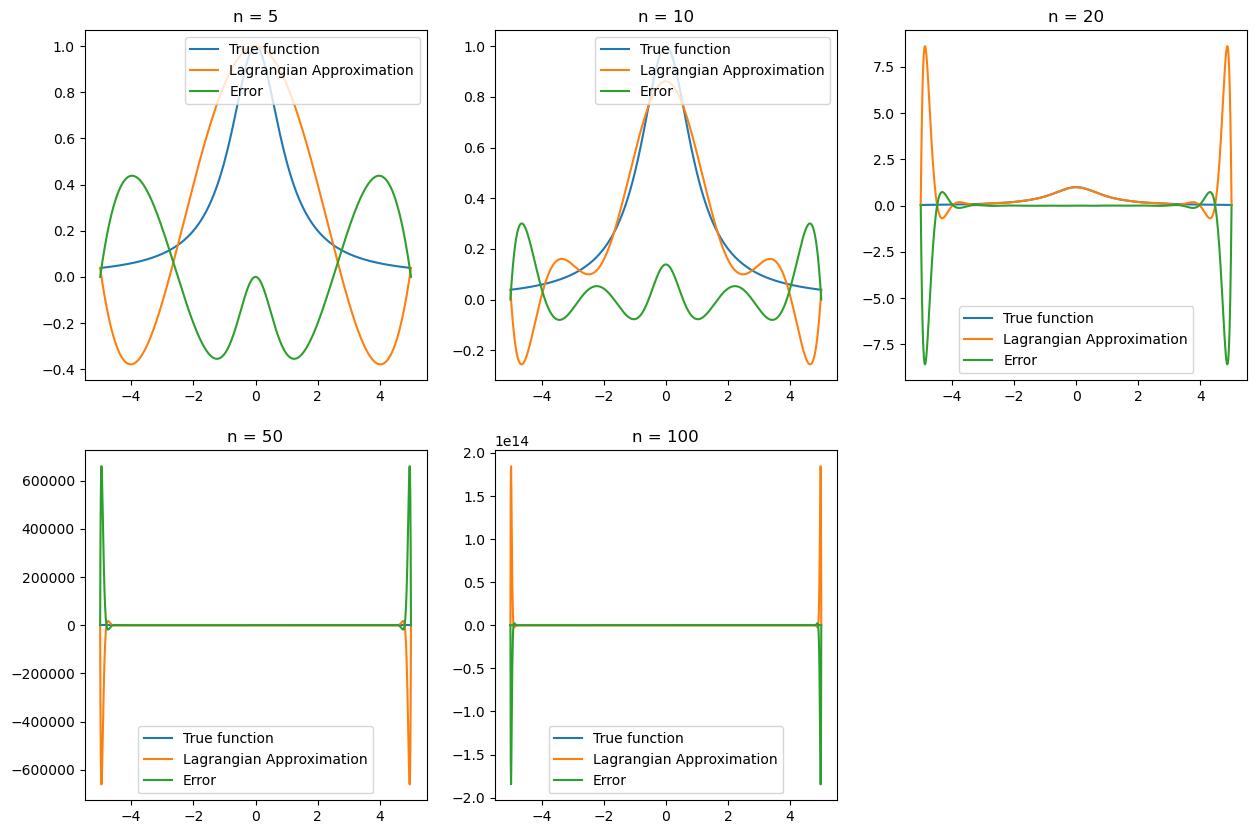

In [13]:
def f1(x):
    return 1/(1 + x**2)


def lagrange_grapher(func, a, b):
    grid_sizes = [5, 10, 20, 50, 100]
    x = np.linspace(a, b, 1000)
    y = func(x)
    plt.figure(figsize=(15, 10))

    for i, n in enumerate(grid_sizes):
        x_vals = np.linspace(a, b, n)
        y_vals = func(x_vals)
        y_approx = [lagrange_interpolation(x_vals, y_vals, i) for i in x]
        error = y - y_approx
        max_error = np.abs(y - y_approx).max()
        print('Max error for n = ',n,'is', max_error)
        
        plt.subplot(2, 3, i+1)
        plt.title(f"n = {n}")
        plt.plot(x, y, label="True function")
        plt.plot(x, y_approx, label="Lagrangian Approximation")
        plt.plot(x, error, label="Error")
        plt.legend()

    plt.show()

lagrange_grapher(f1,-5,5)

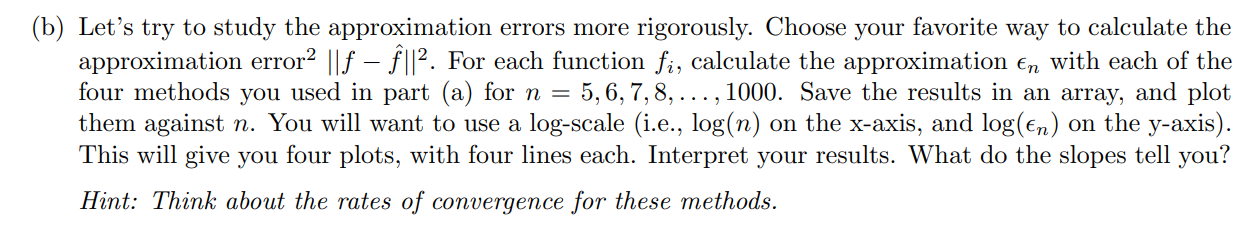

In [24]:
def approx_err_func(n,true_function, approx_function, a,b):
    '''
    Function that outputs the scalar error between the function evaluated using true function
    and approximated
    input:
    @ n : how many nodes
    @ a: lower bound of the domain (x input)
    @ b: upper bound of the domain (x input)
    output:
    @ error: scalar value 
    '''

    x = np.linspace(a,b,n) #where we evaluate on 
    error = np.zeros(n) #array to store errors 
    #then evaluate both the true_func and approx_func at the same x values
    y = true_function(x) #ture function evaluated at x 
    approx_func = approx_function(x, true_function,a,b)
    for i in range(n):
        error[i] = (y[i]-approx_func[i])**2 #squared error difference
    return np.mean(error) #returns scalar value 

#then we define approx functions of all 4 , start with linear interpilation , cubic splines , lagrangian , then chebyshev 


#the errors are zero for y values evaluated at the x nodes wow 
def linear_interpolation_approx(x,true_function,a,b):
    '''
    input: 
    @ x: values where the function is evaluated at with the approximation 
    function(not true funtion)
    @ true_function: need this to make the interpolation function since we need x and y coordinates

    output: array y values evaluated using approximation function  (dim: x)     '''
    
    # x = np.linspace(a, b, n) #to create approximation function, but we've defined this in approx_err_func
    y = true_function(x) #to create approximation function
    lin_interp = interp1d(x,y) #create the function , the cunction made outputs approximated y
    # x_k = np.linspace(a,b,n) use x only 
    y_approx = lin_interp(x)
    return y_approx

  
def cubicsplines_interpolation_approx(x,true_function,a,b):
    '''
    input: 
    @ x: values where the function is evaluated at with the approximation 
    function(not true funtion)
    @ true_function: need this to make the interpolation function since we need x and y coordinates

    output: array y values evaluated using approximation function  (dim: x)     
    '''
    y = true_function(x) 
    cubic_interp = interp1d(x,y, kind = 'cubic') 
    y_approx = cubic_interp(x)
    return y_approx



def lagrangian_interpolation_approx(x,true_function,a,b):
    '''
    input: 
    @ x: values where the function is evaluated at with the approximation 
    function(not true funtion)
    @ true_function: need this to make the interpolation function since we need x and y coordinates

    output: array y values evaluated using approximation function  (dim: x)     
    '''
    # n = len(x)
    # x = np.linspace(a, b, n) n 
    # y = true_function(x)this is defined in the error functio
    lagrangian_interp_func = lagrange(x,y) #creates the lagrangian functon 
    y_approx = lagrangian_interp_func(x)
    return y_approx


#define a function that does chebyshev 
# inputting an array x at where it is evaluatede at using chebyshev 
#output should be an array of y values evaluated at x using the chebyshev approximatiin function

def chebyshev_interpolation_approx(x, true_function,a,b):
    '''
    input: 
    @ x: values where the function is evaluated at with the approximation 
    function(not true funtion)
    @ true_function: need this to make the interpolation function since we need x and y coordinates

    output: array y values evaluated using approximation function  (dim: x)     
    '''
    n = len(x)
    nodes = chebyshev_nodes(n, a, b) 
    fvals = true_function(nodes) #function evaluated at nodes 
    coefficients = chebyshev.chebfit(nodes, fvals, n) #chebyshev coefficients 
    y_approx = chebyshev.chebval(x, coefficients) #chebyshev approximation i.e subs our coefficients into eqns (7) in the slides
    return y_approx




# test case 

# n = 6
# a = 0.1
# b = 1
# x = np.linspace(a,b,n)
# print(x)
 
linear_interpolation_approx(x,f3,a,b)
# approx_err_func(n,true_function, approx_function, a,b)
approx_err_func(n,f3,linear_interpolation_approx,a,b)

approximation_functions = [linear_interpolation_approx, cubicsplines_interpolation_approx, lagrangian_interpolation_approx, chebyshev_interpolation_approx]


def one_b_grapher(function, a, b ):
   n_values = np.arange(5, 101)
 
   plt.figure(figsize=(10, 6))
 
   for approx_func in approximation_functions:
       errors = []
       for n in n_values:
           error = approx_err_func(n, function, approx_func, a, b)
           errors.append(error)
 
       plt.plot(np.log(n_values), np.log(errors), label=approx_func._name_)
 
   plt.title(function)
   plt.xlabel("log(n)")
   plt.ylabel("log(error)")
   plt.legend()
   plt.show()
 
one_b_grapher(f1,-1, 1) #this takes 20 seconds ish
#for n = 100 code takes 36 seconds, doing n up to 1000 would take too long
 
#takes about one minute to run
one_b_grapher(f2,-1,1)
one_b_grapher(f3,0.000001,1)
one_b_grapher(f4,-5,5)

C:\Users\HENGYI\AppData\Local\Temp\ipykernel_17584\1724219093.py:125: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(n_values), np.log(errors), label=approx_func._name_)


AttributeError: 'function' object has no attribute '_name_'

<Figure size 1000x600 with 0 Axes>

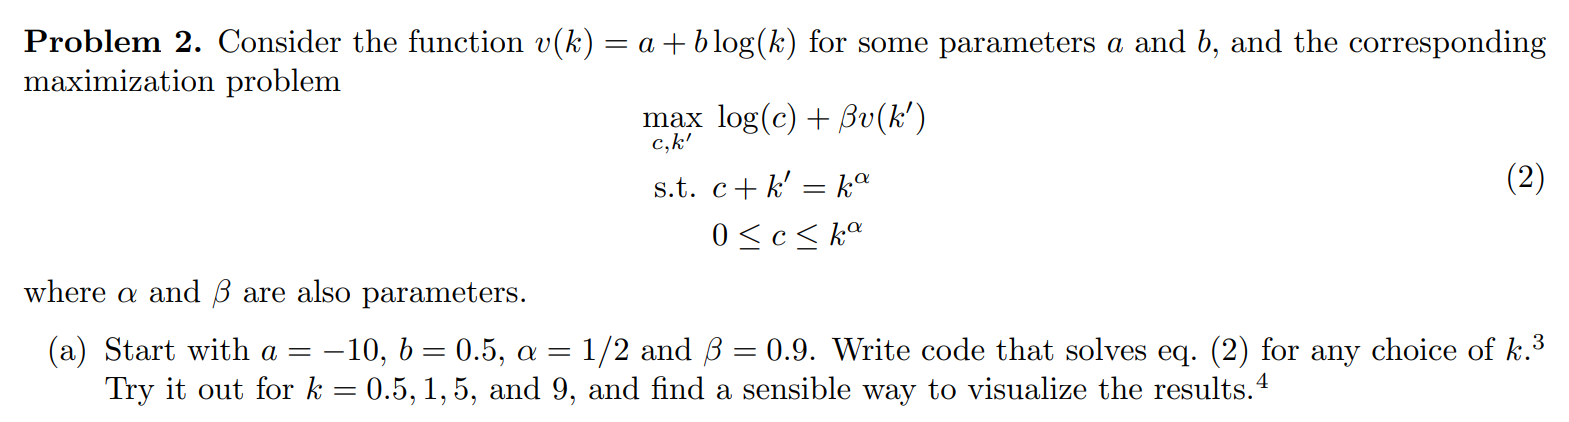

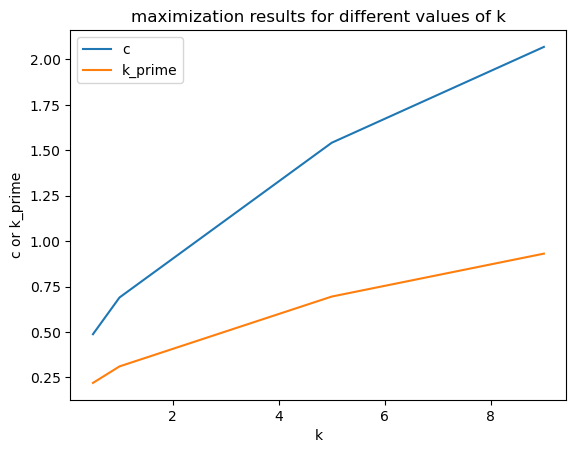

In [25]:
# define the given function
def v(k, a=-10, b=0.5): # start with the given values for a and b
    return a + b*np.log(k)

# define the objective function to be maxmized
def objective(c, k, alpha=1/2, beta=0.9):
    k_prime = k**alpha - c # constraint
    return -np.log(c) - beta*v(k_prime) # make it negative because of "maximization"

# define a function to maximize the objective function
def solve_maximization(k, alpha=1/2):
    bounds = ((0, k**alpha),)
    constraints = [{'type': 'ineq', 'fun': lambda c: k**alpha - c - 10**-8}]
    result = minimize(objective, k**alpha/2, args=(k,), bounds=bounds, constraints=constraints)
    c = result.x[0]
    k_prime = k**alpha - c
    return c, k_prime

# create a list of values of k to try out
k_values = [0.5, 1, 5, 9]
# create empty lists for a and k' to store results
c_values = []
k_prime_values = []

# plug in different values of k into the maximization function and store results
for k in k_values:
    c, k_prime = solve_maximization(k)
    c_values.append(c)
    k_prime_values.append(k_prime)

# print and plot the results
plt.plot(k_values, c_values, label='c')
plt.plot(k_values, k_prime_values, label='k_prime')
plt.xlabel('k')
plt.ylabel('c or k_prime')
plt.title('maximization results for different values of k')
plt.legend()
plt.show()

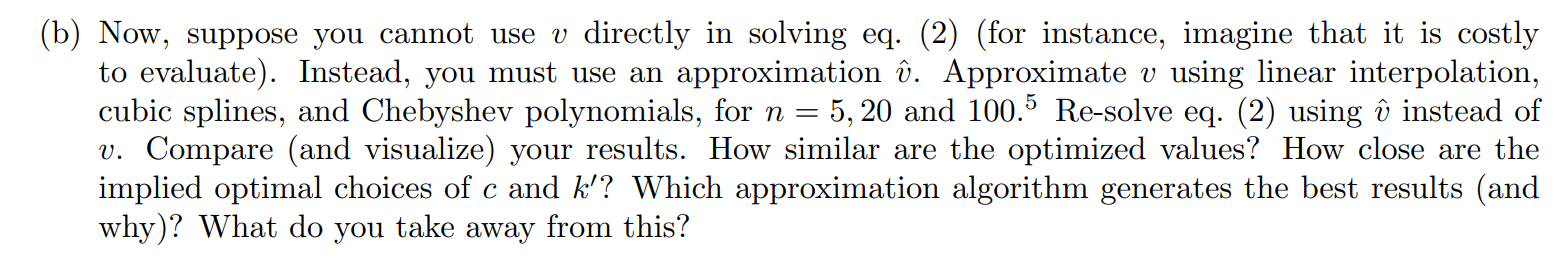

a = -12.511598287752294
b = 0.9090902485962444


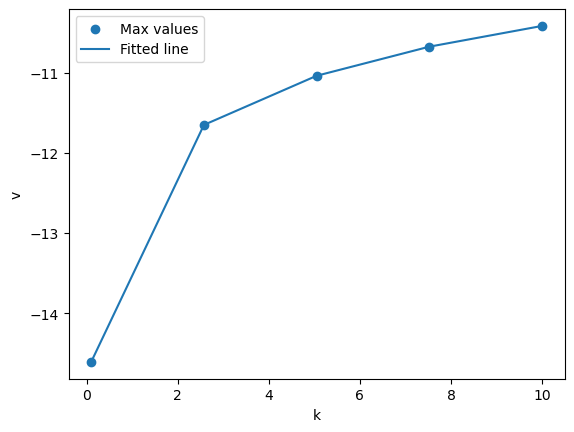

The resulting a and b are -12.511598287752294 and 0.9090902485962444 respectively. They are different from the initial guesses.


In [26]:
# define the function v(k)
def v(k, a, b):
    return a + b * np.log(k)

# set the parameters and the tolerance for convergence
alpha = 0.5
beta = 0.9
k_values = np.linspace(0.1, 10, 5)
tol = 1e-8

# initial guesses
a = -10
b = 0.5

# iterate until convergence
while True:
    # step 1: solve the optimization problem for each k
    vi_values = []
    for k in k_values:
        obj_func = lambda c: -np.log(c) - beta * v(k**(alpha) - c, a, b)
        bounds = (0, k**alpha)
        result = minimize_scalar(obj_func, bounds=bounds, method='bounded')
        vi = -obj_func(result.x)
        vi_values.append(vi)

    # step 2: find the values of a and b that minimize the sum of squared differences
    def loss_func(params):
        a, b = params
        return np.sum((vi_values - (a + b * np.log(k_values)))**2)

    result = minimize(loss_func, [a, b])
    a_new, b_new = result.x

    # step 3: sheck for convergence and stop if close enough otherwise back to step 1
    if np.sqrt((a_new - a)**2 + (b_new - b)**2) < tol:
        break
    else:
        a, b = a_new, b_new

# new values for a and b
print('a =', a_new)
print('b =', b_new)

# plot the results
plt.scatter(k_values, vi_values, label='Max values')
plt.plot(k_values, a_new + b_new * np.log(k_values), label='Fitted line')
plt.xlabel('k')
plt.ylabel('v')
plt.legend()
plt.show()

# report
print("The resulting a and b are", a_new, "and", b_new, "respectively. They are different from the initial guesses.")

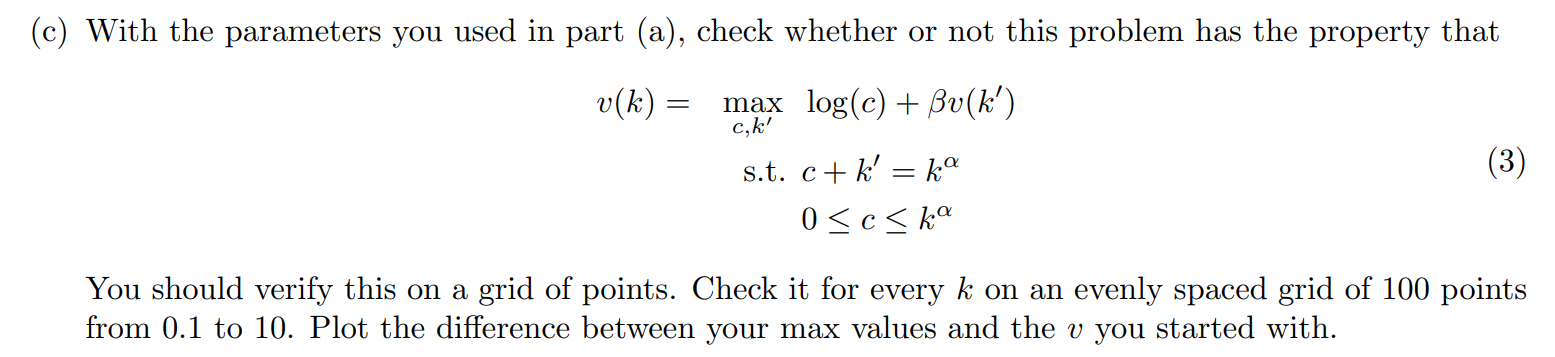

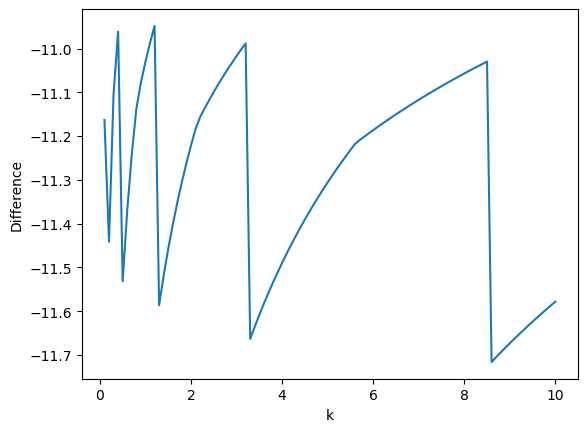

The differences between the original function and the optimal values are not zeros, so the problem does not have the property.


In [28]:
# define the function v(k)
def v(k, a=-10, b=0.5):
    return a + b * np.log(k)

# define the problem
def opt_func(k, alpha=0.5, beta=0.9):
    # define the objective function
    def objective(c):
        return np.log(c) + beta * v(k=(k**alpha - c)**(1/alpha))
    # set the bounds and find the result
    bounds = (0, k**alpha)
    res = minimize_scalar(objective, bounds=bounds, method='bounded')
    return res.fun, res.x, k**alpha - res.x

# evaluate the optimization problem on a grid of k values
k_values = np.linspace(0.1, 10, 100)
diff_values = []
for k in k_values:
    v_k = v(k)
    opt_value, opt_c, opt_k = opt_func(k)
    diff = opt_value - v_k
    diff_values.append(diff)

# plot the differences
import matplotlib.pyplot as plt
plt.plot(k_values, diff_values)
plt.xlabel('k')
plt.ylabel('Difference')
plt.show()


print("The differences between the original function and the optimal values are not zeros, so the problem does not have the property.")

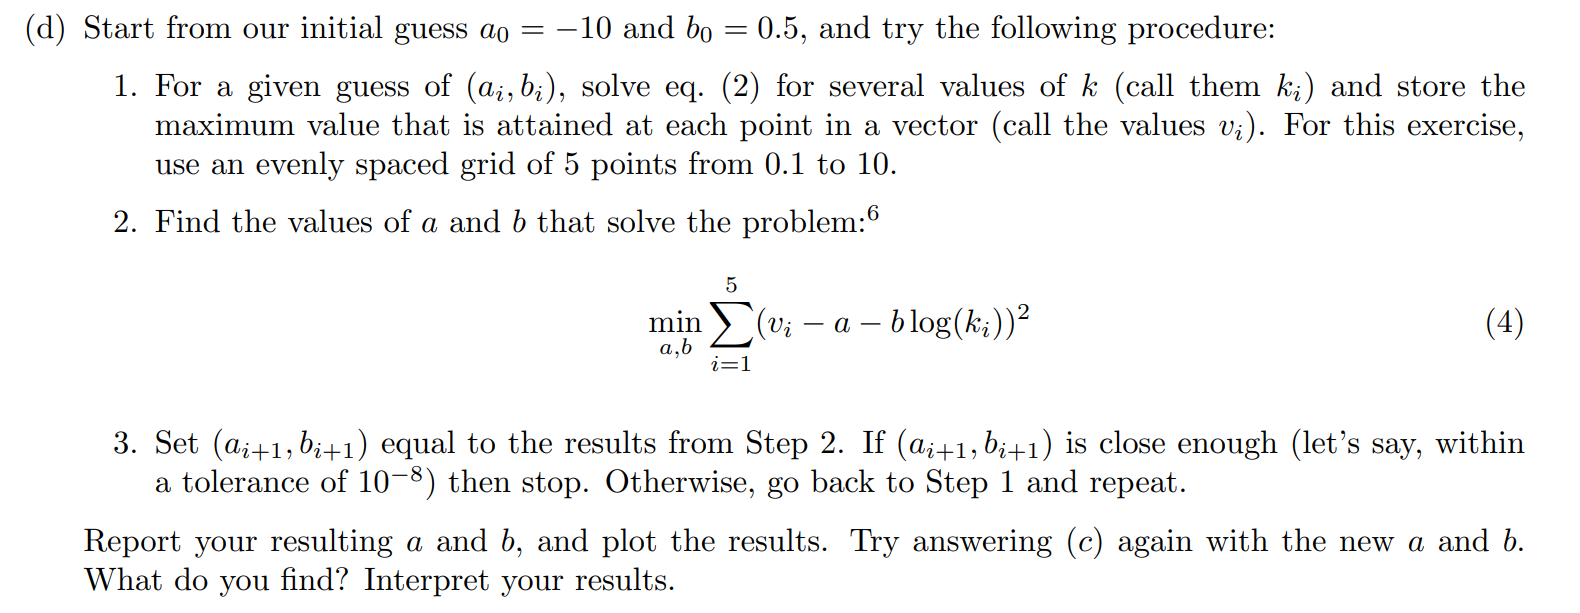

a = -12.511598287752294
b = 0.9090902485962444


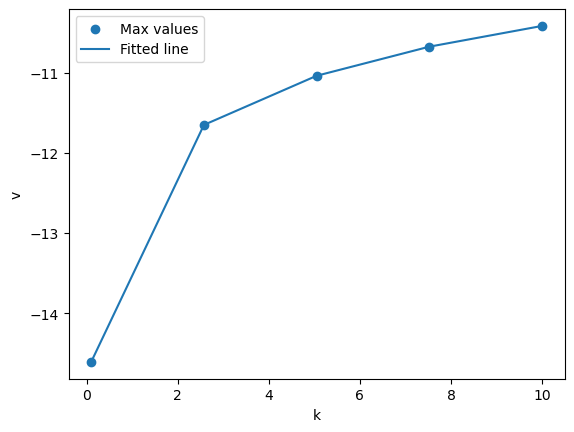

The resulting a and b are -12.511598287752294 and 0.9090902485962444 respectively. They are different from the initial guesses.


In [27]:
# define the function v(k)
def v(k, a, b):
    return a + b * np.log(k)

# set the parameters and the tolerance for convergence
alpha = 0.5
beta = 0.9
k_values = np.linspace(0.1, 10, 5)
tol = 1e-8

# initial guesses
a = -10
b = 0.5

# iterate until convergence
while True:
    # step 1: solve the optimization problem for each k
    vi_values = []
    for k in k_values:
        obj_func = lambda c: -np.log(c) - beta * v(k**(alpha) - c, a, b)
        bounds = (0, k**alpha)
        result = minimize_scalar(obj_func, bounds=bounds, method='bounded')
        vi = -obj_func(result.x)
        vi_values.append(vi)

    # step 2: find the values of a and b that minimize the sum of squared differences
    def loss_func(params):
        a, b = params
        return np.sum((vi_values - (a + b * np.log(k_values)))**2)

    result = minimize(loss_func, [a, b])
    a_new, b_new = result.x

    # step 3: sheck for convergence and stop if close enough otherwise back to step 1
    if np.sqrt((a_new - a)**2 + (b_new - b)**2) < tol:
        break
    else:
        a, b = a_new, b_new

# new values for a and b
print('a =', a_new)
print('b =', b_new)

# plot the results
plt.scatter(k_values, vi_values, label='Max values')
plt.plot(k_values, a_new + b_new * np.log(k_values), label='Fitted line')
plt.xlabel('k')
plt.ylabel('v')
plt.legend()
plt.show()

# report
print("The resulting a and b are", a_new, "and", b_new, "respectively. They are different from the initial guesses.")